In [254]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import gutenberg, stopwords
import warnings
warnings.filterwarnings("ignore")

In [107]:
titles = ['1984', 'animal', 'brave', 'cats', 'do', 'gather', 'scanner', 'sh5']

In [108]:
file = open('C:\\Users\\justf\\Desktop\\txtfiles\\1984.txt')

In [109]:
def cleaner(text):
    pattern = "[\[].*?[\]]"
    text = re.sub(pattern, '', text)
    text = ' '.join(text.split())
    text = re.sub('[ï»¿]', '', text)
    text = re.sub(r'Chapter \d+', '', text)
    text = text.lower()
    return text

In [110]:
text_1984 = file.read()

In [111]:
text_1984 = cleaner(text_1984)

In [112]:
import spacy
nlp = spacy.load('en')

In [113]:
doc_1984 = nlp(text_1984)

In [114]:
sents_1984 = [[sent, "Orwell", '1984'] for sent in doc_1984.sents]

In [115]:
file_animal = open('C:\\Users\\justf\\Desktop\\txtfiles\\animalfarm.txt')

In [116]:
text_aniaml = file_animal.read()

In [117]:
text_aniaml = cleaner(text_aniaml)

In [118]:
doc_animal = nlp(text_aniaml)

In [119]:
file_brave = open('C://Users//justf//Desktop//txtfiles/bravenewworld.txt')
text_brave = file_brave.read()
text_brave = cleaner(text_brave)
doc_brave = nlp(text_brave)

In [120]:
# take each file and have it read()
# name it 'read_*filename*' 
# take each read_file and have it cleaned
# name each cleaned file "text_*filename*"
# have text_file converted to Spacy, name "doc_*filename*"

In [121]:
file_cats = open('C://Users//justf//Desktop//txtfiles/catscraddle.txt')
text_cats = file_cats.read()
text_cats = cleaner(text_cats)
doc_cats = nlp(text_cats)

In [122]:
file_do = open('C://Users//justf//Desktop//txtfiles/doandriods.txt')
text_do = file_do.read()
text_do = cleaner(text_do)
doc_do = nlp(text_do)

In [123]:
file_gather = open('C://Users//justf//Desktop//txtfiles/gatheringblue.txt')
text_gather = file_gather.read()
text_gather = cleaner(text_gather)
doc_gather = nlp(text_gather)

In [124]:
file_scanner = open('C://Users//justf//Desktop//txtfiles/scannerdarkly.txt')
text_scanner = file_scanner.read()
text_scanner = cleaner(text_scanner)
doc_scanner = nlp(text_scanner)

In [125]:
file_sh5 = open('C://Users//justf//Desktop//txtfiles/slaughterhouse5.txt')
text_sh5 = file_sh5.read()
text_sh5 = cleaner(text_sh5)
doc_sh5 = nlp(text_sh5)

In [126]:
sents_sh5 = [[sent, 'Vonnegut', "Slaughter House 5"] for sent in  doc_sh5.sents]
sents_scanner = [[sent, 'Dick', 'A Scanner Darkly'] for sent in doc_scanner.sents]
sents_gather = [[sent, 'Lowry', 'Gathering Blue'] for sent in doc_gather.sents]
sents_do = [[sent, 'Dick', 'Do Andriods'] for sent in doc_do.sents]
sents_cats = [[sent, "Vonnegut", "Cat's Craddle"] for sent in doc_cats.sents]
sents_brave = [[sent, "Huxley",  'Brave New Word'] for sent in doc_brave.sents]
sents_animal = [[sent, "Orwell", "Animal Farm"] for sent in doc_animal.sents]

In [196]:
sentences = pd.DataFrame(sents_1984[0:300] + sents_animal[0:300] + sents_brave[0:300] + sents_cats[0:300] +
                         sents_do[0:300] +sents_gather[0:300]+ sents_scanner[0:300] +sents_sh5[0:300] +
                         sents_1984[-301:-1] + sents_animal[-301:-1] + sents_brave[-301:-1] + sents_cats[-301:-1] +
                         sents_do[-301:-1] +sents_gather[-301:-1]+ sents_scanner[-301:-1] +sents_sh5[-301:-1])

In [197]:
sentences.columns = ['Sentence', 'Author', 'Book']

In [198]:
sentences.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Data columns (total 3 columns):
Sentence    4800 non-null object
Author      4800 non-null object
Book        4800 non-null object
dtypes: object(3)
memory usage: 112.6+ KB


In [199]:
# sentences.to_csv('C:\\Users\\justf\\Desktop\\txtfiles\\test.csv')
sentences.iloc[:,0] = sentences.iloc[:,0].astype('str')

In [200]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=1, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=False, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

In [201]:
sents_tfidf = vectorizer.fit_transform(sentences.iloc[:,0].values)

In [202]:
sents_tfidf.shape

(4800, 8067)

In [203]:
sents_tfidf_csr = sents_tfidf.tocsr()

In [204]:
n = sents_tfidf_csr.shape[0]

In [205]:
print(n)

4800


In [211]:
from sklearn.cluster import KMeans

num_clusters = 5
km = KMeans(n_clusters=num_clusters, random_state=24)

%time km.fit(sents_tfidf)

clusters = km.labels_.tolist()

Wall time: 4.17 s


In [212]:
km.cluster_centers_

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.85737680e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.81881471e-04, 1.07598392e-04, 7.01609507e-05, ...,
        8.39265116e-05, 1.80206257e-04, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [213]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(sents_tfidf)

In [214]:
import os  # for os.path.basename
import matplotlib as mpl
from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=24)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [215]:
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=sentences.loc[:,'Book'])) 

In [216]:
groups = df.groupby('label')

In [249]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a',
                  4:'#BDB76B'}
#         5:'#FFD700', 6: '#00FF00', 7:'#FAA460'}

#set up cluster names using a dict
cluster_names = {0: 'One', 
                 1: 'Two', 
                 2: 'Three', 
                 3: 'Four',
                 4: 'Five'}
#                  5: 'Six',
#                  6: 'Seven', 
#                  7: 'Eight'}

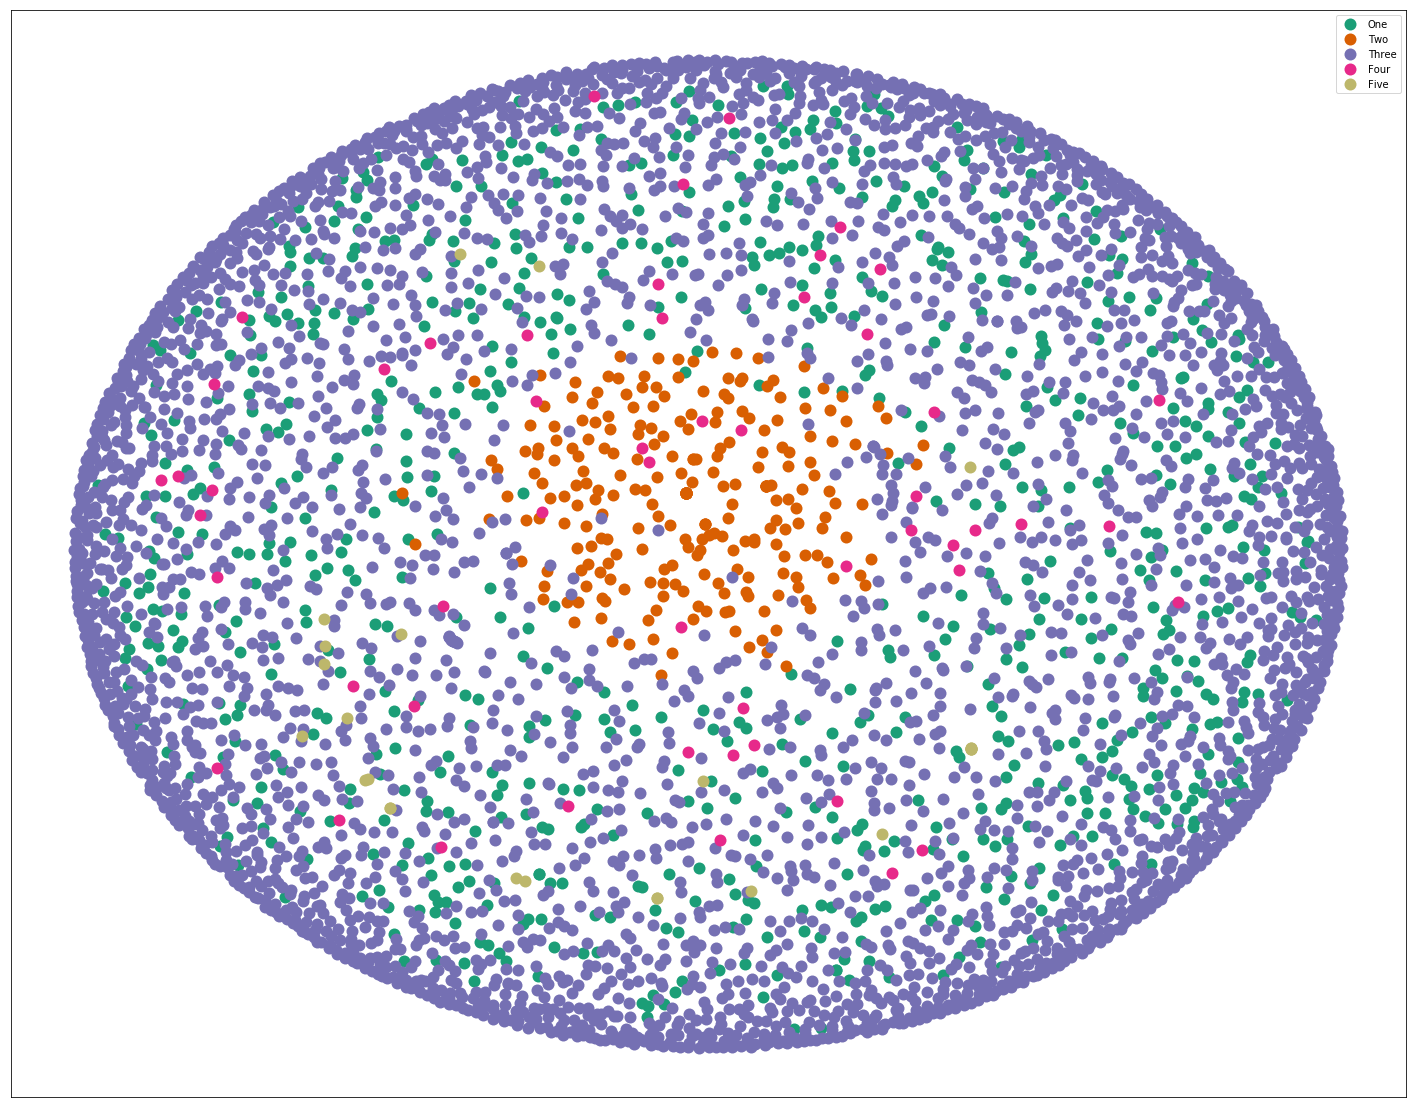

In [257]:
fig, ax = plt.subplots(figsize=(25, 20)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
# for i in range(len(df)):
#     ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

In [219]:
from sklearn.cluster import MiniBatchKMeans

In [228]:
mbk = MiniBatchKMeans(n_clusters=5, max_iter=20000, init='k-means++', batch_size=235, random_state=24)
mbk.fit(sents_tfidf)
mini_clusters = mbk.labels_.tolist()

In [229]:
xs_mini, ys_mini = pos[:, 0], pos[:, 1]

In [230]:
df_mini = pd.DataFrame(dict(x=xs_mini, y=ys_mini, label=mini_clusters, title=sentences.loc[:,'Book'])) 

In [231]:
groups_mini = df_mini.groupby('label')

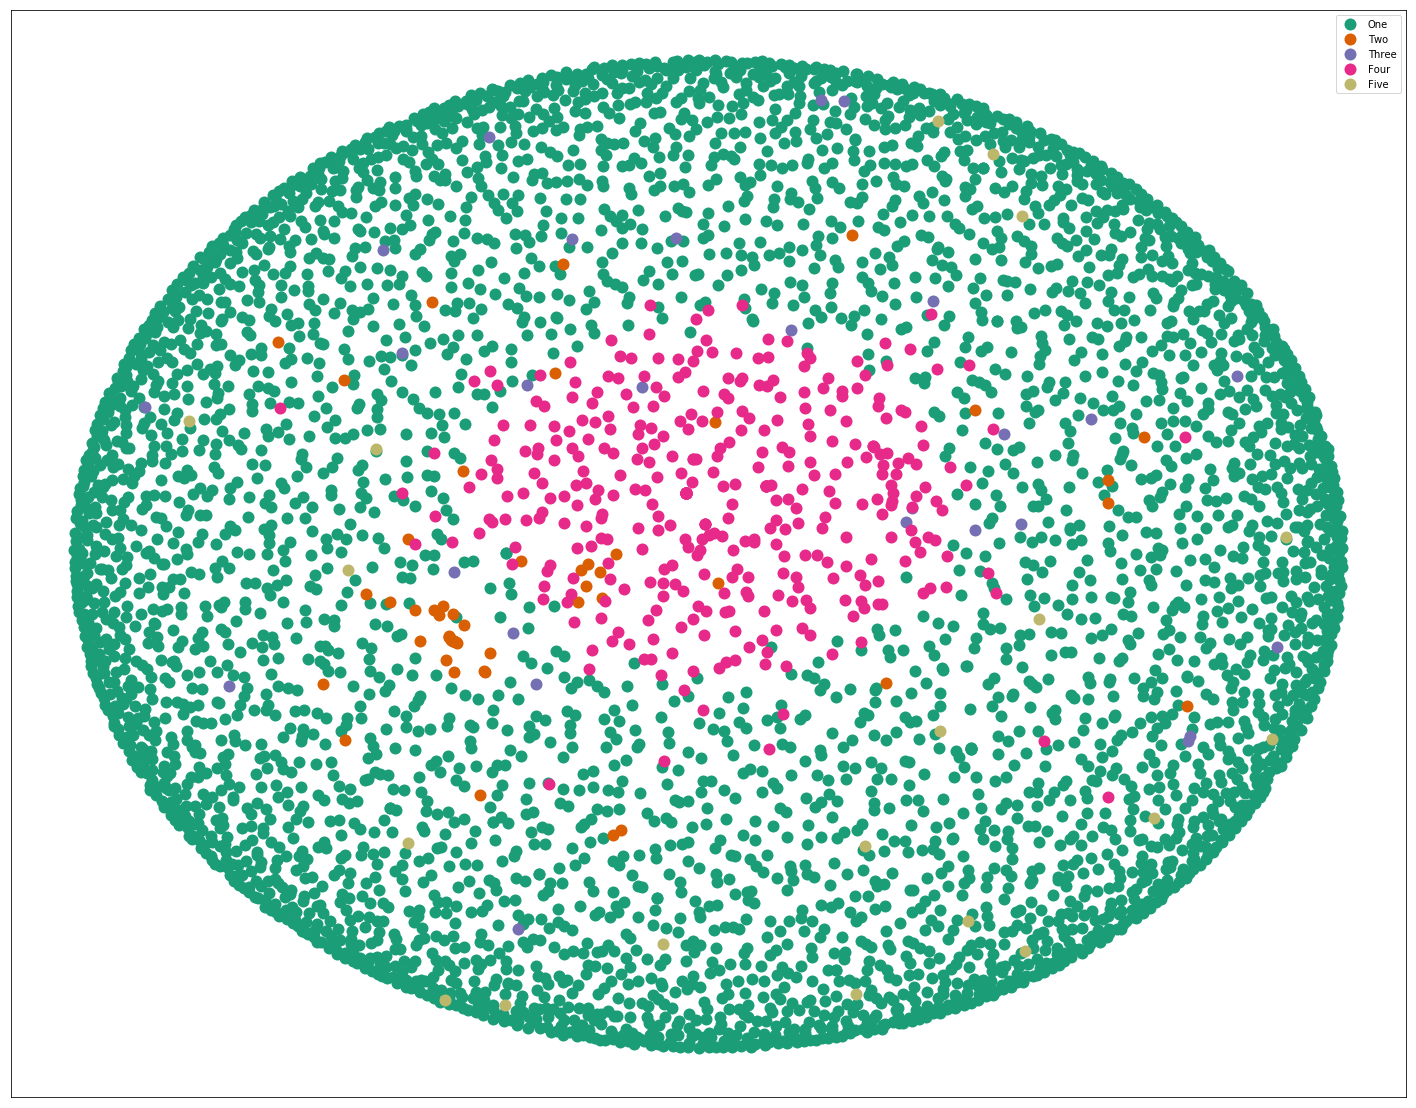

In [258]:
fig, ax = plt.subplots(figsize=(25, 20)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups_mini:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='False',      # ticks along the bottom edge are off
        top='False',         # ticks along the top edge are off
        labelbottom='False')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='False',      # ticks along the bottom edge are off
        top='False',         # ticks along the top edge are off
        labelleft='False')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
# for i in range(len(df)):
#     ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

In [227]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

In [233]:
af = AffinityPropagation().fit(sents_tfidf)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 236


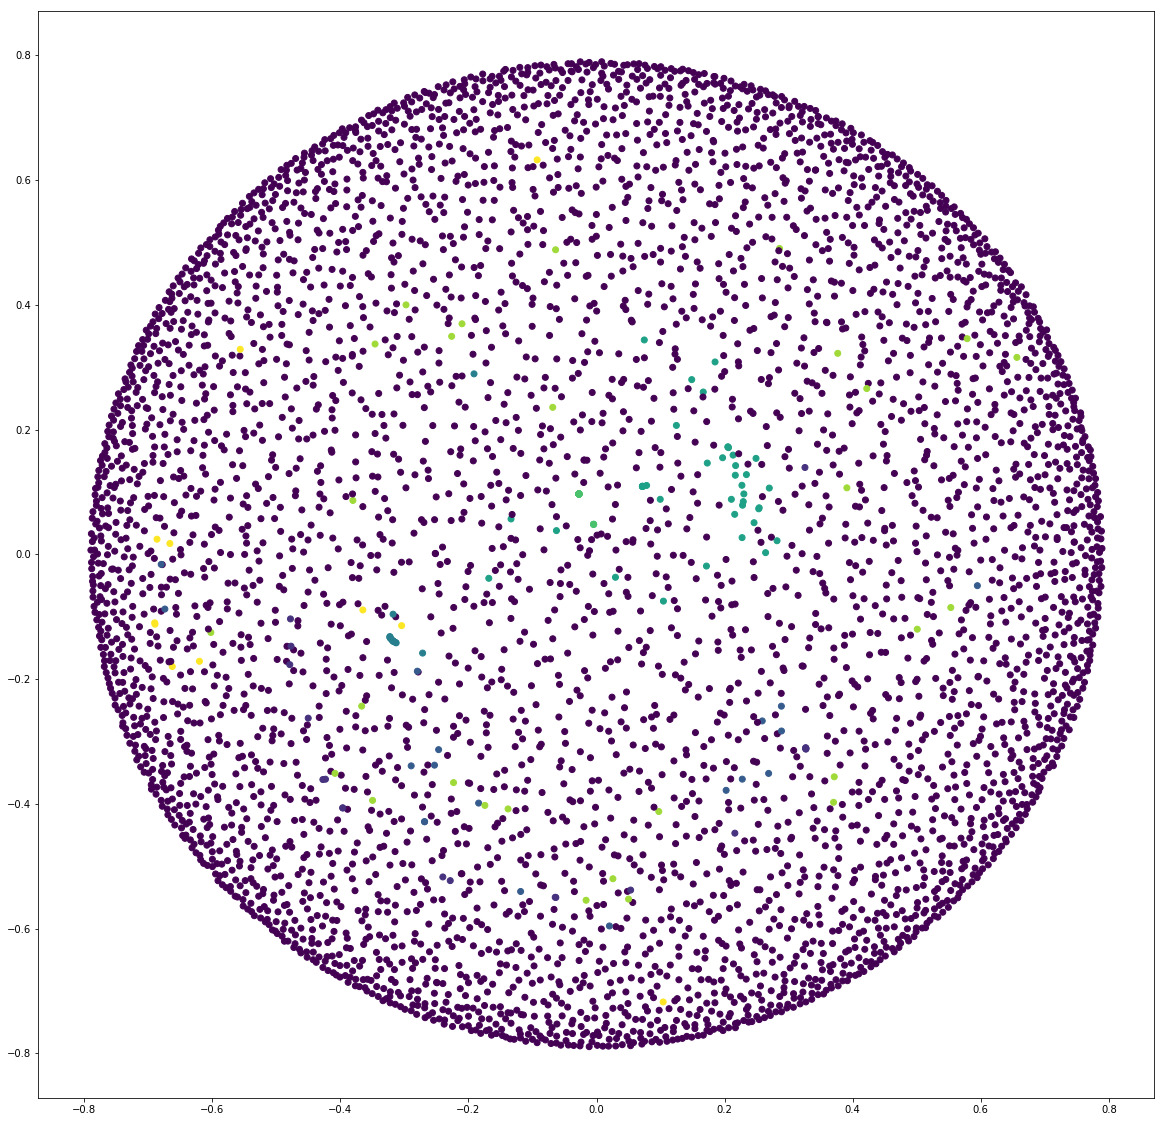

In [263]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=8

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(sents_tfidf)

#Predicted clusters.
predict=sc.fit_predict(sents_tfidf)

# #Graph results.
plt.figure(figsize=(20,20))
plt.scatter(xs, ys, c=predict)
plt.show()


In [262]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(sents_tfidf.toarray(), quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(sents_tfidf.toarray())

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 1
